In [7]:
# Cell 1: Import ไลบรารีที่จำเป็น
import numpy as np
import matplotlib.pyplot as plt
import warnings

# ปิดคำเตือน (เผื่อกรณีมีปัญหาการหารด้วยศูนย์)
warnings.filterwarnings('ignore')

# ตั้งค่าให้กราฟสวยงามขึ้น
plt.rcParams['font.family'] = 'Tahoma' # ใช้ฟอนต์ที่รองรับภาษาไทย
plt.rcParams.update({'font.size': 12, 'figure.figsize': (12, 7)})

In [8]:
# Cell 2: กำหนดค่า Payoff Matrix (ปรับได้)

# --- !! ปรับเมทริกซ์ผลตอบแทนของคุณที่นี่ !! ---
#
# Player A ต้องมี 2 แถว (2 กลยุทธ์)
# Player B สามารถมีกี่คอลัมน์ก็ได้ (n กลยุทธ์)
#
# ตัวอย่าง 2x4 (โจทย์ปัจจุบัน)
payoff_matrix = np.array([
    [2, 2, 3, -1],  # กลยุทธ์ A1
    [4, 3, 2, 6]    # กลยุทธ์ A2
])

# # ตัวอย่าง 2x3 (โจทย์เดิม)
# payoff_matrix = np.array([
#     [1, 3, 11],  # กลยุทธ์ A1
#     [8, 5, 2]    # กลยุทธ์ A2
# ])

# # ตัวอย่าง 2x5
# payoff_matrix = np.array([
#     [10, 2, 8, 1, 9], # A1
#     [0, 7, 3, 6, 4]  # A2
# ])
# ----------------------------------------------------

# นับจำนวนกลยุทธ์ของ Player B อัตโนมัติ
num_a_strategies, num_b_strategies = payoff_matrix.shape

if num_a_strategies != 2:
    print("!!! ข้อผิดพลาด !!!")
    print("เมทริกซ์นี้ไม่สามารถใช้วิธีกราฟได้ วิธีกราฟ (Graphical Method) ใช้สำหรับเกมขนาด 2xn หรือ mx2 เท่านั้น")
    print("กรุณาตรวจสอบว่า Payoff Matrix ของคุณมี 2 แถว (สำหรับ Player A)")
else:
    print(f"กำลังประมวลผลเกมขนาด {num_a_strategies}x{num_b_strategies}...")
    print("เมทริกซ์ผลตอบแทน (Payoff Matrix):")
    print(payoff_matrix)

กำลังประมวลผลเกมขนาด 2x4...
เมทริกซ์ผลตอบแทน (Payoff Matrix):
[[ 2  2  3 -1]
 [ 4  3  2  6]]


In [9]:
# Cell 3: สร้างสมการค่าคาดหวัง (Expected Payoff Equations) - (อัตโนมัติ)

# สร้างช่วงของค่า p จาก 0 ถึง 1
# p คือความน่าจะเป็นที่ Player A เลือก A1
p_values = np.linspace(0, 1, 200) # เพิ่มความละเอียดเป็น 200 จุด

# เตรียม list ไว้เก็บสมการและชื่อสมการ
expected_payoffs_list = []
equation_labels = []

# วนลูปตามจำนวนกลยุทธ์ของ Player B (จำนวนคอลัมน์)
for j in range(num_b_strategies):
    # E(p) = (Payoff A1) * p + (Payoff A2) * (1-p)
    E_j = payoff_matrix[0, j] * p_values + payoff_matrix[1, j] * (1 - p_values)
    expected_payoffs_list.append(E_j)
    
    # สร้างชื่อสมการสำหรับแสดงในกราฟ (เช่น 'E1 (B1): -7p + 8')
    # รูปแบบ y = ap + b
    a = payoff_matrix[0, j] - payoff_matrix[1, j]
    b = payoff_matrix[1, j]
    label = f"E{j+1} (B{j+1}): ${a:.0f}p + {b:.0f}$"
    equation_labels.append(label)

# แปลง list ของสมการให้เป็น 2D NumPy Array (ขนาด n x 200)
# เพื่อให้ง่ายต่อการคำนวณหาค่า min/max
payoff_array = np.array(expected_payoffs_list)

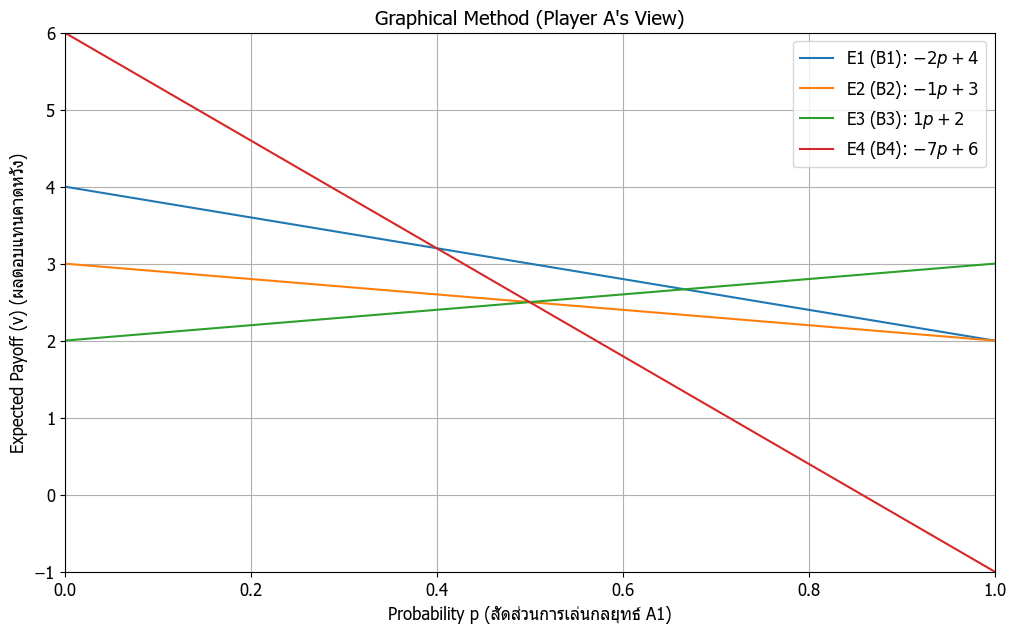

In [10]:
# Cell 4: พล็อตกราฟของแต่ละสมการ (อัตโนมัติ)

if num_a_strategies == 2:
    for j in range(num_b_strategies):
        plt.plot(p_values, payoff_array[j], label=equation_labels[j])

    plt.title('Graphical Method (Player A\'s View)')
    plt.xlabel('Probability p (สัดส่วนการเล่นกลยุทธ์ A1)')
    plt.ylabel('Expected Payoff (v) (ผลตอบแทนคาดหวัง)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlim(0, 1)
    plt.ylim(bottom=np.min(payoff_array), top=np.max(payoff_array)) # ปรับแกน Y อัตโนมัติ
    plt.show()

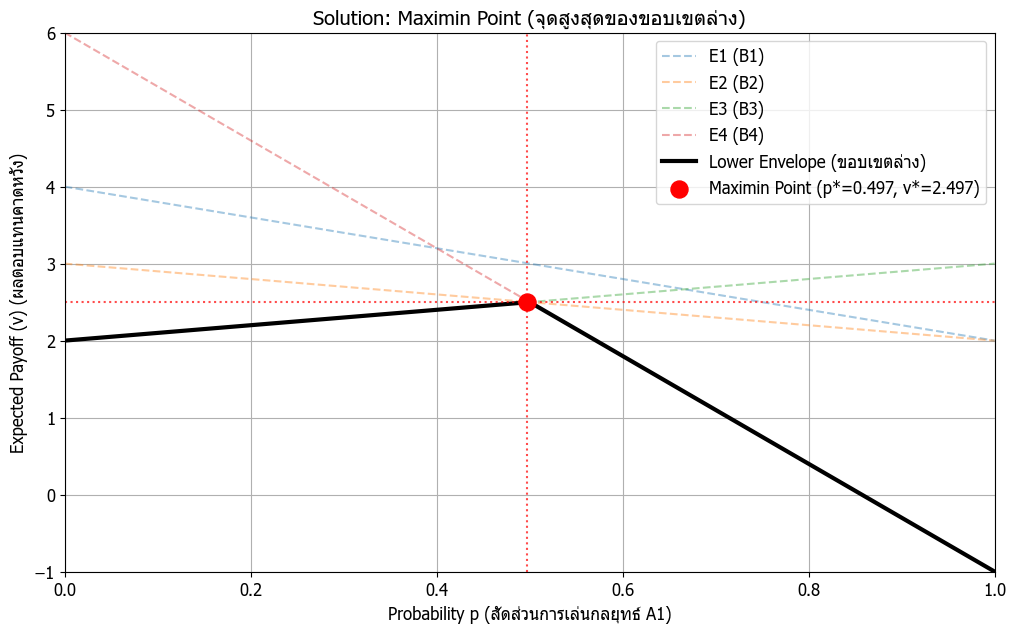

In [11]:
# Cell 5: ค้นหาจุด Maximin และพล็อตกราฟเฉลย (อัตโนมัติ)

if num_a_strategies == 2:
    # 1. หาขอบเขตล่าง (Lower Envelope)
    #    คือค่าที่ต่ำที่สุดในแนวตั้ง (axis=0) ณ แต่ละจุดของ p
    lower_envelope = np.min(payoff_array, axis=0)

    # 2. หาจุด Maximin
    #    คือจุดที่สูงที่สุด (max) บนขอบเขตล่าง
    v_optimal = np.max(lower_envelope)
    
    # 3. หาค่า p ที่ดีที่สุด
    #    คือตำแหน่ง (index) ที่ให้ค่า v_optimal
    p_optimal_index = np.argmax(lower_envelope)
    p_optimal = p_values[p_optimal_index]
    
    # --- พล็อตกราฟเฉลย ---

    # พล็อตทุกสมการเป็นเส้นประ
    for j in range(num_b_strategies):
        plt.plot(p_values, payoff_array[j], label=f"E{j+1} (B{j+1})", linestyle='--', alpha=0.4)

    # พล็อตขอบเขตล่าง (Lower Envelope) ด้วยเส้นหนาสีดำ
    plt.plot(p_values, lower_envelope, label='Lower Envelope (ขอบเขตล่าง)', color='black', linewidth=3)

    # พล็อตจุด Maximin (คำตอบ)
    plt.scatter(p_optimal, v_optimal, color='red', s=150, zorder=5, 
                label=f'Maximin Point (p*={p_optimal:.3f}, v*={v_optimal:.3f})')
    
    # เพิ่มเส้นประแนวตั้งและแนวนอนไปยังจุด optimal
    plt.axhline(y=v_optimal, color='red', linestyle=':', alpha=0.7)
    plt.axvline(x=p_optimal, color='red', linestyle=':', alpha=0.7)

    plt.title('Solution: Maximin Point (จุดสูงสุดของขอบเขตล่าง)')
    plt.xlabel('Probability p (สัดส่วนการเล่นกลยุทธ์ A1)')
    plt.ylabel('Expected Payoff (v) (ผลตอบแทนคาดหวัง)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlim(0, 1)
    plt.ylim(bottom=np.min(payoff_array), top=np.max(payoff_array))
    plt.show()

In [12]:
# Cell 6: สรุปผลลัพธ์ (อัตโนมัติ)

if num_a_strategies == 2:
    print(f"--- สรุปผลลัพธ์สำหรับเกม {num_a_strategies}x{num_b_strategies} ---")
    print(f"\nกลยุทธ์ที่ดีที่สุดสำหรับ Player A (Optimal Strategy p*): {p_optimal:.4f}")
    print(f"  -> เล่นกลยุทธ์ A1 ด้วยความน่าจะเป็น: {p_optimal:.4f} (หรือ {p_optimal*100:.2f}%)")
    print(f"  -> เล่นกลยุทธ์ A2 ด้วยความน่าจะเป็น: {1-p_optimal:.4f} (หรือ {(1-p_optimal)*100:.2f}%)")
    
    print(f"\nมูลค่าของเกม (Value of the Game, v*): {v_optimal:.4f}")
    print("  (นี่คือผลตอบแทนคาดหวังที่ Player A จะได้รับเป็นอย่างน้อย เมื่อเล่นตามกลยุทธ์นี้)")

    # (ขั้นสูง) หาสมการที่เกี่ยวข้องกับจุด optimal
    # คือสมการที่ค่า E_j ณ จุด p_optimal "เกือบเท่ากับ" v_optimal
    relevant_indices = np.where(np.isclose(payoff_array[:, p_optimal_index], v_optimal))[0]
    relevant_strategies_b = [f"B{i+1}" for i in relevant_indices]

    print(f"\nกลยุทธ์ที่เกี่ยวข้องของ Player B:")
    print(f"  -> จุด Maximin นี้เกิดจากการตัดกันของสมการ: {', '.join(relevant_strategies_b)}")
    print("  -> หมายความว่า Player B ควรเล่นผสมเฉพาะกลยุทธ์เหล่านี้ (และตัดกลยุทธ์อื่นทิ้ง)")
    
    # คำนวณค่า p และ v ที่แม่นยำ (สำหรับเกม 2x2 ที่ลดรูปแล้ว)
    if len(relevant_indices) == 2:
        j1 = relevant_indices[0]
        j2 = relevant_indices[1]
        
        # แก้สมการ E_j1 = E_j2
        # a1*p + b1 = a2*p + b2
        # (a1-a2)p = b2 - b1
        # p = (b2-b1) / (a1-a2)
        a1 = payoff_matrix[0, j1] - payoff_matrix[1, j1]
        b1 = payoff_matrix[1, j1]
        a2 = payoff_matrix[0, j2] - payoff_matrix[1, j2]
        b2 = payoff_matrix[1, j2]
        
        if (a1 - a2) != 0:
            p_exact = (b2 - b1) / (a1 - a2)
            v_exact = a1 * p_exact + b1
            print("\n--- ค่าที่แม่นยำ (คำนวณจากพีชคณิต) ---")
            print(f"  p* (exact) = {p_exact:.6f}")
            print(f"  v* (exact) = {v_exact:.6f}")

--- สรุปผลลัพธ์สำหรับเกม 2x4 ---

กลยุทธ์ที่ดีที่สุดสำหรับ Player A (Optimal Strategy p*): 0.4975
  -> เล่นกลยุทธ์ A1 ด้วยความน่าจะเป็น: 0.4975 (หรือ 49.75%)
  -> เล่นกลยุทธ์ A2 ด้วยความน่าจะเป็น: 0.5025 (หรือ 50.25%)

มูลค่าของเกม (Value of the Game, v*): 2.4975
  (นี่คือผลตอบแทนคาดหวังที่ Player A จะได้รับเป็นอย่างน้อย เมื่อเล่นตามกลยุทธ์นี้)

กลยุทธ์ที่เกี่ยวข้องของ Player B:
  -> จุด Maximin นี้เกิดจากการตัดกันของสมการ: B3
  -> หมายความว่า Player B ควรเล่นผสมเฉพาะกลยุทธ์เหล่านี้ (และตัดกลยุทธ์อื่นทิ้ง)


# Minimax m X 2

In [ ]:
# Cell 1: Import ไลบรารีที่จำเป็น
import numpy as np
import matplotlib.pyplot as plt
import warnings

# ปิดคำเตือน
warnings.filterwarnings('ignore')

# ตั้งค่าให้กราฟสวยงามขึ้น
plt.rcParams['font.family'] = 'Tahoma' 
plt.rcParams.update({'font.size': 12, 'figure.figsize': (12, 7)})

In [14]:
# Cell 2: กำหนดค่า Payoff Matrix (ปรับได้)

# --- !! ปรับเมทริกซ์ผลตอบแทนของคุณที่นี่ (สำหรับ m x 2) !! ---
#
# Player A สามารถมีกี่แถวก็ได้ (m แถว)
# Player B ต้องมี 2 คอลัมน์ (2 กลยุทธ์)
#
# ตัวอย่าง 3x2 (โจทย์ปัจจุบัน)
payoff_matrix = np.array([
    [2, 8],  # กลยุทธ์ A1
    [2, 3],  # กลยุทธ์ A2
    [3, 2],   # กลยุทธ์ A3
    [-2, 6]   # กลยุทธ์ A4
])

# # ตัวอย่าง 4x2
# payoff_matrix = np.array([
#     [1, 6],  # A1
#     [5, 2],  # A2
#     [3, 8],  # A3
#     [7, 0]   # A4
# ])
# ----------------------------------------------------

# นับจำนวนกลยุทธ์
num_a_strategies, num_b_strategies = payoff_matrix.shape

if num_b_strategies != 2:
    print("!!! ข้อผิดพลาด !!!")
    print("เมทริกซ์นี้ไม่สามารถใช้วิธีกราฟ Minimax (มุมมอง Player B) ได้")
    print("วิธีกราฟ Minimax ใช้สำหรับเกมขนาด mx2 เท่านั้น (Player B มี 2 กลยุทธ์)")
else:
    print(f"กำลังประมวลผลเกมขนาด {num_a_strategies}x{num_b_strategies}...")
    print("เมทริกซ์ผลตอบแทน (Payoff Matrix):")
    print(payoff_matrix)

กำลังประมวลผลเกมขนาด 4x2...
เมทริกซ์ผลตอบแทน (Payoff Matrix):
[[ 2  8]
 [ 2  3]
 [ 3  2]
 [-2  6]]


In [15]:
# Cell 3: สร้างสมการค่าคาดหวัง (Expected Payoff Equations)

# สร้างช่วงของค่า q จาก 0 ถึง 1
# q คือความน่าจะเป็นที่ Player B เลือก B1
q_values = np.linspace(0, 1, 200)

expected_payoffs_list = []
equation_labels = []

# วนลูปตามจำนวนกลยุทธ์ของ Player A (จำนวนแถว)
for i in range(num_a_strategies):
    # E(q) = (Payoff B1) * q + (Payoff B2) * (1-q)
    E_i = payoff_matrix[i, 0] * q_values + payoff_matrix[i, 1] * (1 - q_values)
    expected_payoffs_list.append(E_i)
    
    # สร้างชื่อสมการสำหรับแสดงในกราฟ
    a = payoff_matrix[i, 0] - payoff_matrix[i, 1]
    b = payoff_matrix[i, 1]
    label = f"E{i+1} (ถ้า A เลือก A{i+1}): ${a:.0f}q + {b:.0f}$"
    equation_labels.append(label)

# แปลง list ของสมการให้เป็น 2D NumPy Array
payoff_array = np.array(expected_payoffs_list)

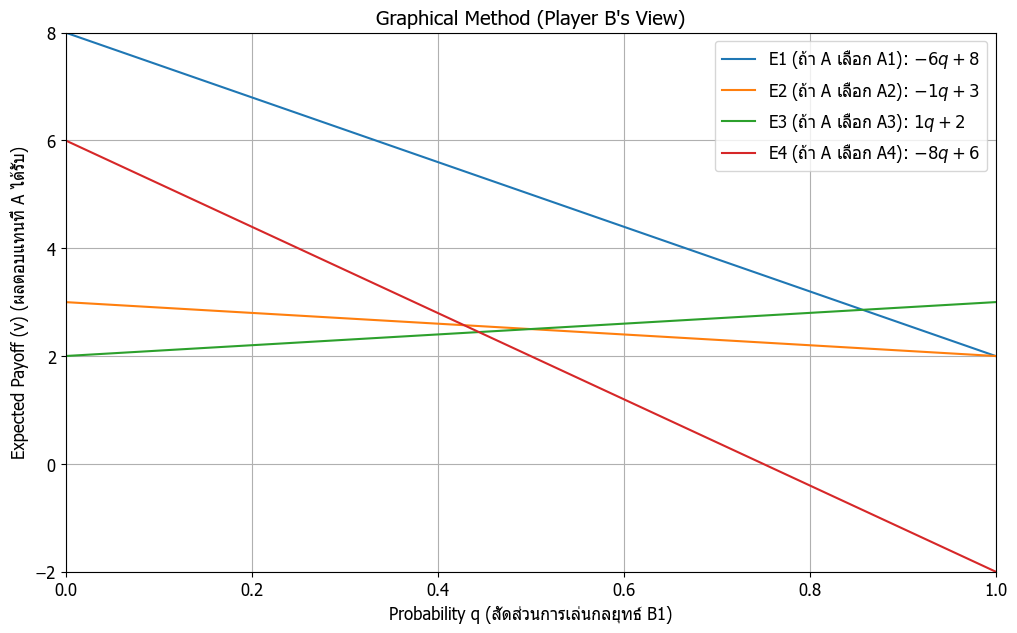

In [16]:
# Cell 4: พล็อตกราฟของแต่ละสมการ

if num_b_strategies == 2:
    for i in range(num_a_strategies):
        plt.plot(q_values, payoff_array[i], label=equation_labels[i])

    plt.title('Graphical Method (Player B\'s View)')
    plt.xlabel('Probability q (สัดส่วนการเล่นกลยุทธ์ B1)')
    plt.ylabel('Expected Payoff (v) (ผลตอบแทนที่ A ได้รับ)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlim(0, 1)
    plt.ylim(bottom=np.min(payoff_array), top=np.max(payoff_array))
    plt.show()

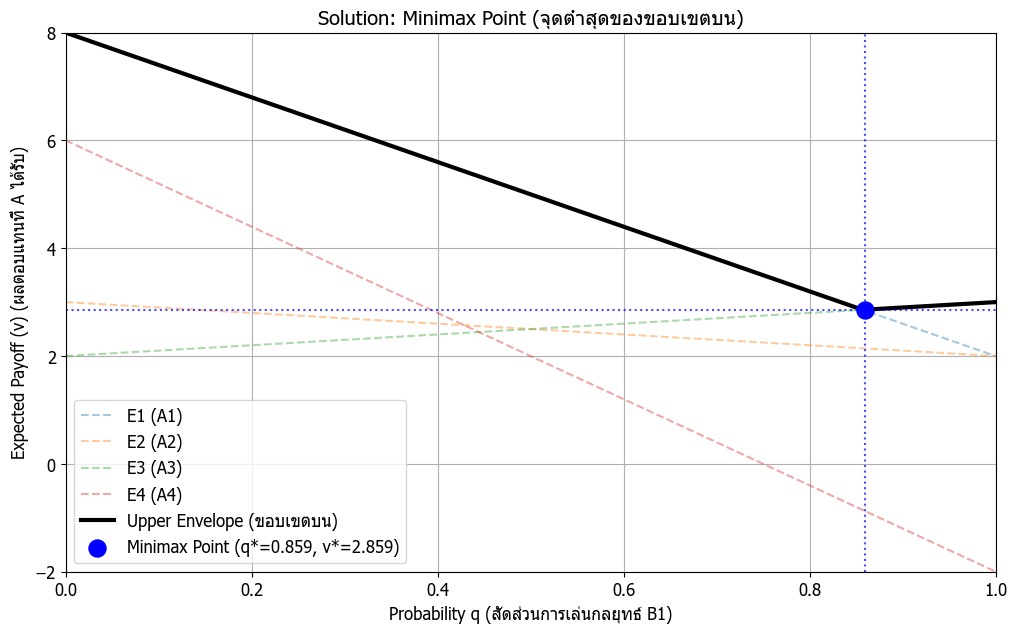

In [17]:
# Cell 5: ค้นหาจุด Minimax และพล็อตกราฟเฉลย

if num_b_strategies == 2:
    # 1. หาขอบเขตบน (Upper Envelope)
    #    คือค่าที่สูงสุดในแนวตั้ง (axis=0) ณ แต่ละจุดของ q
    upper_envelope = np.max(payoff_array, axis=0)

    # 2. หาจุด Minimax
    #    คือจุดที่ต่ำที่สุด (min) บนขอบเขตบน
    v_optimal = np.min(upper_envelope)
    
    # 3. หาค่า q ที่ดีที่สุด
    #    คือตำแหน่ง (index) ที่ให้ค่า v_optimal
    q_optimal_index = np.argmin(upper_envelope)
    q_optimal = q_values[q_optimal_index]
    
    # --- พล็อตกราฟเฉลย ---

    # พล็อตทุกสมการเป็นเส้นประ
    for i in range(num_a_strategies):
        plt.plot(q_values, payoff_array[i], label=f"E{i+1} (A{i+1})", linestyle='--', alpha=0.4)

    # พล็อตขอบเขตบน (Upper Envelope) ด้วยเส้นหนาสีดำ
    plt.plot(q_values, upper_envelope, label='Upper Envelope (ขอบเขตบน)', color='black', linewidth=3)

    # พล็อตจุด Minimax (คำตอบ)
    plt.scatter(q_optimal, v_optimal, color='blue', s=150, zorder=5, 
                label=f'Minimax Point (q*={q_optimal:.3f}, v*={v_optimal:.3f})')
    
    # เพิ่มเส้นประแนวตั้งและแนวนอนไปยังจุด optimal
    plt.axhline(y=v_optimal, color='blue', linestyle=':', alpha=0.7)
    plt.axvline(x=q_optimal, color='blue', linestyle=':', alpha=0.7)

    plt.title('Solution: Minimax Point (จุดต่ำสุดของขอบเขตบน)')
    plt.xlabel('Probability q (สัดส่วนการเล่นกลยุทธ์ B1)')
    plt.ylabel('Expected Payoff (v) (ผลตอบแทนที่ A ได้รับ)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlim(0, 1)
    plt.ylim(bottom=np.min(payoff_array), top=np.max(payoff_array))
    plt.show()

In [18]:
# Cell 6: สรุปผลลัพธ์

if num_b_strategies == 2:
    print(f"--- สรุปผลลัพธ์สำหรับเกม {num_a_strategies}x{num_b_strategies} (Minimax) ---")
    print(f"\nกลยุทธ์ที่ดีที่สุดสำหรับ Player B (Optimal Strategy q*): {q_optimal:.4f}")
    print(f"  -> เล่นกลยุทธ์ B1 ด้วยความน่าจะเป็น: {q_optimal:.4f} (หรือ {q_optimal*100:.2f}%)")
    print(f"  -> เล่นกลยุทธ์ B2 ด้วยความน่าจะเป็น: {1-q_optimal:.4f} (หรือ {(1-q_optimal)*100:.2f}%)")
    
    print(f"\nมูลค่าของเกม (Value of the Game, v*): {v_optimal:.4f}")
    print("  (นี่คือผลตอบแทนคาดหวัง 'สูงสุด' ที่ Player B จะต้องเสีย (หรือ A จะได้รับ) เมื่อเล่นตามกลยุทธ์นี้)")

    # (ขั้นสูง) หาสมการที่เกี่ยวข้อง
    relevant_indices = np.where(np.isclose(payoff_array[:, q_optimal_index], v_optimal))[0]
    relevant_strategies_a = [f"A{i+1}" for i in relevant_indices]

    print(f"\nกลยุทธ์ที่เกี่ยวข้องของ Player A:")
    print(f"  -> จุด Minimax นี้เกิดจากการตัดกันของสมการ: {', '.join(relevant_strategies_a)}")
    print("  -> หมายความว่า Player A ควรเล่นผสมเฉพาะกลยุทธ์เหล่านี้ (และตัดกลยุทธ์อื่นทิ้ง)")
    
    # คำนวณค่า q และ v ที่แม่นยำ
    if len(relevant_indices) == 2:
        i1 = relevant_indices[0]
        i2 = relevant_indices[1]
        
        # แก้สมการ E_i1 = E_i2
        a1 = payoff_matrix[i1, 0] - payoff_matrix[i1, 1]
        b1 = payoff_matrix[i1, 1]
        a2 = payoff_matrix[i2, 0] - payoff_matrix[i2, 1]
        b2 = payoff_matrix[i2, 1]
        
        if (a1 - a2) != 0:
            q_exact = (b2 - b1) / (a1 - a2)
            v_exact = a1 * q_exact + b1
            print("\n--- ค่าที่แม่นยำ (คำนวณจากพีชคณิต) ---")
            print(f"  q* (exact) = {q_exact:.6f}")
            print(f"  v* (exact) = {v_exact:.6f}")

--- สรุปผลลัพธ์สำหรับเกม 4x2 (Minimax) ---

กลยุทธ์ที่ดีที่สุดสำหรับ Player B (Optimal Strategy q*): 0.8593
  -> เล่นกลยุทธ์ B1 ด้วยความน่าจะเป็น: 0.8593 (หรือ 85.93%)
  -> เล่นกลยุทธ์ B2 ด้วยความน่าจะเป็น: 0.1407 (หรือ 14.07%)

มูลค่าของเกม (Value of the Game, v*): 2.8593
  (นี่คือผลตอบแทนคาดหวัง 'สูงสุด' ที่ Player B จะต้องเสีย (หรือ A จะได้รับ) เมื่อเล่นตามกลยุทธ์นี้)

กลยุทธ์ที่เกี่ยวข้องของ Player A:
  -> จุด Minimax นี้เกิดจากการตัดกันของสมการ: A3
  -> หมายความว่า Player A ควรเล่นผสมเฉพาะกลยุทธ์เหล่านี้ (และตัดกลยุทธ์อื่นทิ้ง)


# game Reduction

## function

In [27]:
# Cell 1: Import ไลบรารีที่จำเป็น
import numpy as np
import matplotlib.pyplot as plt
import warnings

# ปิดคำเตือน
warnings.filterwarnings('ignore')

# ตั้งค่าให้กราฟสวยงามขึ้น
plt.rcParams['font.family'] = 'Tahoma' 
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 6)})

print("ไลบรารีพร้อมใช้งาน")

ไลบรารีพร้อมใช้งาน


In [28]:
# Cell 2: ฟังก์ชันสำหรับลดขนาดเกม (Dominance Reduction)

def apply_dominance(matrix):
    """
    ใช้หลักการ Dominance เพื่อลดขนาดของ Payoff Matrix
    จะวนลูปจนกว่าจะไม่สามารถลดขนาดได้อีก
    """
    m, n = matrix.shape
    rows_kept = np.arange(m)
    cols_kept = np.arange(n)
    
    # เก็บชื่อแถวและคอลัมน์ดั้งเดิม
    original_row_labels = [f"A{i+1}" for i in range(m)]
    original_col_labels = [f"B{j+1}" for j in range(n)]
    
    current_row_labels = original_row_labels.copy()
    current_col_labels = original_col_labels.copy()

    print("--- 2. เริ่มกระบวนการลดขนาด (Dominance) ---")
    
    while True:
        m_old, n_old = m, n
        
        # --- 1. Row Dominance (สำหรับ Player A) ---
        rows_to_remove = set()
        for i in range(m):
            for j in range(m):
                if i == j or i in rows_to_remove or j in rows_to_remove:
                    continue
                
                if np.all(matrix[i, :] <= matrix[j, :]) and np.any(matrix[i, :] < matrix[j, :]):
                    rows_to_remove.add(i)
                    print(f"[Dominance] แถว {current_row_labels[i]} ถูกตัดโดย {current_row_labels[j]} ({current_row_labels[i]} <= {current_row_labels[j]})")
                    break
        
        if rows_to_remove:
            rows_to_keep_indices = [i for i in range(m) if i not in rows_to_remove]
            matrix = matrix[rows_to_keep_indices, :]
            rows_kept = rows_kept[rows_to_keep_indices]
            current_row_labels = [current_row_labels[i] for i in rows_to_keep_indices]
            m = matrix.shape[0]
        
        # --- 2. Column Dominance (สำหรับ Player B) ---
        cols_to_remove = set()
        for k in range(n):
            for l in range(n):
                if k == l or k in cols_to_remove or l in cols_to_remove:
                    continue
                
                if np.all(matrix[:, k] >= matrix[:, l]) and np.any(matrix[:, k] > matrix[:, l]):
                    cols_to_remove.add(k)
                    print(f"[Dominance] คอลัมน์ {current_col_labels[k]} ถูกตัดโดย {current_col_labels[l]} ({current_col_labels[k]} >= {current_col_labels[l]})")
                    break
                        
        if cols_to_remove:
            cols_to_keep_indices = [j for j in range(n) if j not in cols_to_remove]
            matrix = matrix[:, cols_to_keep_indices]
            cols_kept = cols_kept[cols_to_keep_indices]
            current_col_labels = [current_col_labels[j] for j in cols_to_keep_indices]
            n = matrix.shape[1]

        if m == m_old and n == n_old:
            if m_old == matrix.shape[0] and n_old == matrix.shape[1]:
                 print("(ไม่พบกลยุทธ์ที่ถูก dominated)")
            break
            
    print("-" * 30)
    print(f"เกมลดขนาดเหลือ {m}x{n}")
    print("แถวที่เหลือ:", current_row_labels)
    print("คอลัมน์ที่เหลือ:", current_col_labels)
    print("เมทริกซ์ที่ลดรูปแล้ว:")
    print(matrix)
    print("-" * 30)
    
    return matrix, current_row_labels, current_col_labels

In [29]:
# Cell 3: ฟังก์ชันแก้เกมด้วยกราฟ - Maximin (2 x n)

def solve_graphical_maximin(matrix, a_labels, b_labels):
    """
    แก้เกม 2xn ด้วยวิธี Maximin (มุมมอง Player A)
    """
    m, n = matrix.shape
    p_values = np.linspace(0, 1, 200)
    p_label = f"p({a_labels[0]})"
    
    payoff_array = np.zeros((n, 200))
    equation_labels = []
    
    for j in range(n):
        E_j = matrix[0, j] * p_values + matrix[1, j] * (1 - p_values)
        payoff_array[j, :] = E_j
        a = matrix[0, j] - matrix[1, j]
        b = matrix[1, j]
        equation_labels.append(f"E (ถ้า B เลือก {b_labels[j]}): ${a:.0f}p + {b:.0f}$")

    plt.figure(figsize=(10, 6))
    for j in range(n):
        plt.plot(p_values, payoff_array[j], label=equation_labels[j], linestyle='--', alpha=0.6)
        
    lower_envelope = np.min(payoff_array, axis=0)
    v_optimal = np.max(lower_envelope)
    p_optimal_index = np.argmax(lower_envelope)
    p_optimal = p_values[p_optimal_index]
    
    plt.plot(p_values, lower_envelope, label='Lower Envelope (ขอบเขตล่าง)', color='black', linewidth=3)
    plt.scatter(p_optimal, v_optimal, color='red', s=150, zorder=5, 
                label=f'Maximin Point ({p_label}={p_optimal:.3f}, v*={v_optimal:.3f})')
    plt.axhline(y=v_optimal, color='red', linestyle=':', alpha=0.7)
    plt.axvline(x=p_optimal, color='red', linestyle=':', alpha=0.7)

    plt.title(f'Solution: Maximin (มุมมอง Player A)')
    plt.xlabel(f'Probability p (สัดส่วนการเล่น {a_labels[0]})')
    plt.ylabel('Expected Payoff (v)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlim(0, 1)
    plt.show()
    
    print(f"--- สรุปผลลัพธ์ (Maximin) ---")
    print(f"กลยุทธ์ที่ดีที่สุดสำหรับ Player A:")
    print(f"  -> เล่น {a_labels[0]} ด้วยความน่าจะเป็น (p*): {p_optimal:.4f}")
    print(f"  -> เล่น {a_labels[1]} ด้วยความน่าจะเป็น (1-p*): {1-p_optimal:.4f}")
    print(f"มูลค่าของเกม (Value of the Game, v*): {v_optimal:.4f}")

In [30]:
# Cell 4: ฟังก์ชันแก้เกมด้วยกราฟ - Minimax (m x 2)

def solve_graphical_minimax(matrix, a_labels, b_labels):
    """
    แก้เกม mx2 ด้วยวิธี Minimax (มุมมอง Player B)
    """
    m, n = matrix.shape
    q_values = np.linspace(0, 1, 200)
    q_label = f"q({b_labels[0]})"
    
    payoff_array = np.zeros((m, 200))
    equation_labels = []

    for i in range(m):
        E_i = matrix[i, 0] * q_values + matrix[i, 1] * (1 - q_values)
        payoff_array[i, :] = E_i
        a = matrix[i, 0] - matrix[i, 1]
        b = matrix[i, 1]
        equation_labels.append(f"E (ถ้า A เลือก {a_labels[i]}): ${a:.0f}q + {b:.0f}$")

    plt.figure(figsize=(10, 6))
    for i in range(m):
        plt.plot(q_values, payoff_array[i], label=equation_labels[i], linestyle='--', alpha=0.6)

    upper_envelope = np.max(payoff_array, axis=0)
    v_optimal = np.min(upper_envelope)
    q_optimal_index = np.argmin(upper_envelope)
    q_optimal = q_values[q_optimal_index]
    
    plt.plot(q_values, upper_envelope, label='Upper Envelope (ขอบเขตบน)', color='blue', linewidth=3)
    plt.scatter(q_optimal, v_optimal, color='blue', s=150, zorder=5, 
                label=f'Minimax Point ({q_label}={q_optimal:.3f}, v*={v_optimal:.3f})')
    plt.axhline(y=v_optimal, color='blue', linestyle=':', alpha=0.7)
    plt.axvline(x=q_optimal, color='blue', linestyle=':', alpha=0.7)

    plt.title(f'Solution: Minimax (มุมมอง Player B)')
    plt.xlabel(f'Probability q (สัดส่วนการเล่น {b_labels[0]})')
    plt.ylabel('Expected Payoff (v)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlim(0, 1)
    plt.show()

    print(f"--- สรุปผลลัพธ์ (Minimax) ---")
    print(f"กลยุทธ์ที่ดีที่สุดสำหรับ Player B:")
    print(f"  -> เล่น {b_labels[0]} ด้วยความน่าจะเป็น (q*): {q_optimal:.4f}")
    print(f"  -> เล่น {b_labels[1]} ด้วยความน่าจะเป็น (1-q*): {1-q_optimal:.4f}")
    print(f"มูลค่าของเกม (Value of the Game, v*): {v_optimal:.4f}")

In [31]:
# Cell 5: (ตัวแถม) ฟังก์ชันแก้เกม 2x2 ด้วยพีชคณิต
def solve_algebraic_2x2(matrix):
    a11, a12 = matrix[0, 0], matrix[0, 1]
    a21, a22 = matrix[1, 0], matrix[1, 1]
    
    denominator = (a11 + a22 - a12 - a21)
    if denominator == 0:
        return None # ไม่สามารถแก้ได้ (อาจมี Saddle Point)
        
    v = (a11 * a22 - a12 * a21) / denominator
    p = (a22 - a21) / denominator
    q = (a22 - a12) / denominator
    
    return p, q, v

## ตัวหลัก

กำลังวิเคราะห์เกมใหม่ (ขนาด 2x4)
--- 1. เมทริกซ์เริ่มต้น ---
[[ 1  3 11  7]
 [ 8  5  2  4]]
--- 2. เริ่มกระบวนการลดขนาด (Dominance) ---
(ไม่พบกลยุทธ์ที่ถูก dominated)
------------------------------
เกมลดขนาดเหลือ 2x4
แถวที่เหลือ: ['A1', 'A2']
คอลัมน์ที่เหลือ: ['B1', 'B2', 'B3', 'B4']
เมทริกซ์ที่ลดรูปแล้ว:
[[ 1  3 11  7]
 [ 8  5  2  4]]
------------------------------
--- 3. ตรวจสอบขนาดและเลือกวิธีแก้ปัญหา ---
เกมลดรูปเหลือ 2x4 แก้ด้วยวิธีกราฟ (Maximin)


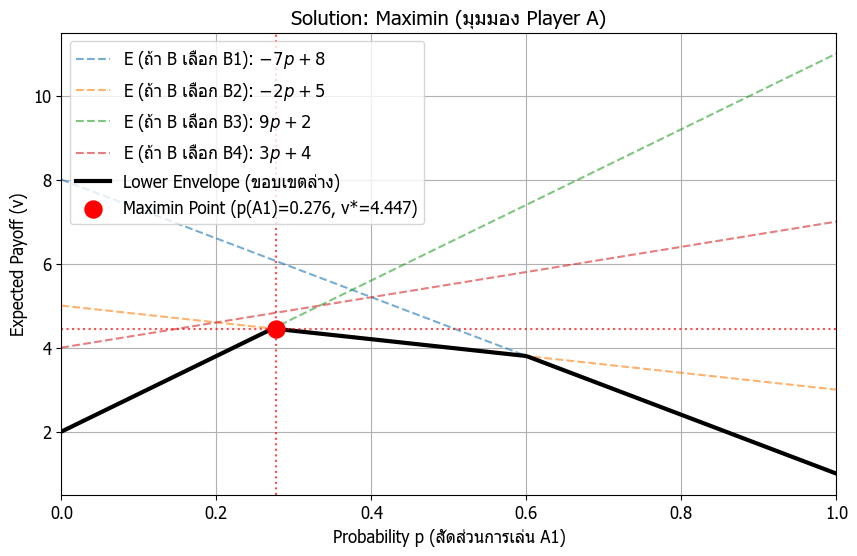

--- สรุปผลลัพธ์ (Maximin) ---
กลยุทธ์ที่ดีที่สุดสำหรับ Player A:
  -> เล่น A1 ด้วยความน่าจะเป็น (p*): 0.2764
  -> เล่น A2 ด้วยความน่าจะเป็น (1-p*): 0.7236
มูลค่าของเกม (Value of the Game, v*): 4.4472

กำลังวิเคราะห์เกมใหม่ (ขนาด 4x2)
--- 1. เมทริกซ์เริ่มต้น ---
[[1 8]
 [6 2]
 [0 9]
 [3 5]]
--- 2. เริ่มกระบวนการลดขนาด (Dominance) ---
(ไม่พบกลยุทธ์ที่ถูก dominated)
------------------------------
เกมลดขนาดเหลือ 4x2
แถวที่เหลือ: ['A1', 'A2', 'A3', 'A4']
คอลัมน์ที่เหลือ: ['B1', 'B2']
เมทริกซ์ที่ลดรูปแล้ว:
[[1 8]
 [6 2]
 [0 9]
 [3 5]]
------------------------------
--- 3. ตรวจสอบขนาดและเลือกวิธีแก้ปัญหา ---
เกมลดรูปเหลือ 4x2 แก้ด้วยวิธีกราฟ (Minimax)


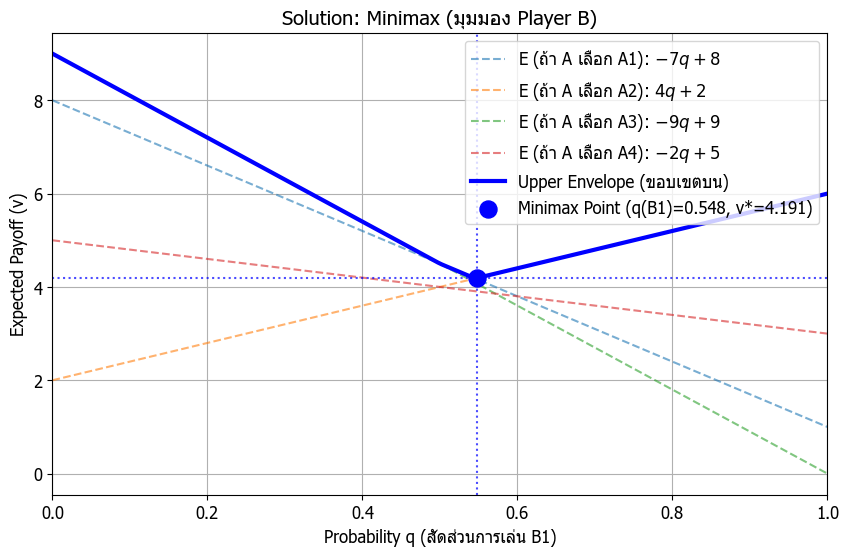

--- สรุปผลลัพธ์ (Minimax) ---
กลยุทธ์ที่ดีที่สุดสำหรับ Player B:
  -> เล่น B1 ด้วยความน่าจะเป็น (q*): 0.5477
  -> เล่น B2 ด้วยความน่าจะเป็น (1-q*): 0.4523
มูลค่าของเกม (Value of the Game, v*): 4.1910



In [32]:
# Cell 6: === โปรแกรมหลัก (Main Program) ===

def process_game(initial_matrix):
    """
    ฟังก์ชันที่รวมทุกขั้นตอน: รับเมทริกซ์, ลดขนาด, และเลือกวิธีแก้
    """
    print("="*50)
    print(f"กำลังวิเคราะห์เกมใหม่ (ขนาด {initial_matrix.shape[0]}x{initial_matrix.shape[1]})")
    print("--- 1. เมทริกซ์เริ่มต้น ---")
    print(initial_matrix)
    
    # 2. ลดขนาดเกมด้วย Dominance
    reduced_matrix, a_labels_kept, b_labels_kept = apply_dominance(initial_matrix.copy())
    m, n = reduced_matrix.shape

    print("--- 3. ตรวจสอบขนาดและเลือกวิธีแก้ปัญหา ---")

    # 3. ตรวจสอบขนาดและเลือกวิธีแก้
    if m == 1 and n == 1:
        print(f"เกมมี Saddle Point ที่ {a_labels_kept[0]} และ {b_labels_kept[0]}")
        print(f"Value of the Game (v) = {reduced_matrix[0, 0]}")

    elif m == 2 and n == 2:
        print(f"เกมลดรูปเหลือ 2x2 แก้ด้วยวิธีกราฟ (Maximin) และพีชคณิต")
        solve_graphical_maximin(reduced_matrix, a_labels_kept, b_labels_kept)
        
        result = solve_algebraic_2x2(reduced_matrix)
        if result:
            p_exact, q_exact, v_exact = result
            print("\n--- ผลลัพธ์ที่แม่นยำ (จากพีชคณิต 2x2) ---")
            print(f"  v* (exact) = {v_exact:.6f}")
            print(f"  p* (สัดส่วน {a_labels_kept[0]}) = {p_exact:.6f}")
            print(f"  q* (สัดส่วน {b_labels_kept[0]}) = {q_exact:.6f}")

    elif m == 2:
        print(f"เกมลดรูปเหลือ 2x{n} แก้ด้วยวิธีกราฟ (Maximin)")
        solve_graphical_maximin(reduced_matrix, a_labels_kept, b_labels_kept)

    elif n == 2:
        print(f"เกมลดรูปเหลือ {m}x2 แก้ด้วยวิธีกราฟ (Minimax)")
        solve_graphical_minimax(reduced_matrix, a_labels_kept, b_labels_kept)

    else:
        print(f"เกมลดรูปเหลือ {m}x{n} ซึ่งยังใหญ่เกินไปสำหรับวิธีกราฟ")
        print("ต้องใช้วิธีอื่น เช่น Linear Programming")
    print("="*50 + "\n")

# =======================================================
# ===           รันตัวอย่างที่ 1 (2 x n)            ===
# =======================================================
matrix_2xn = np.array([
    [1, 3, 11, 7],  # A1
    [8, 5, 2, 4]    # A2
])
process_game(matrix_2xn)


# =======================================================
# ===           รันตัวอย่างที่ 2 (m x 2)            ===
# =======================================================
matrix_mx2 = np.array([
    [1, 8],  # A1
    [6, 2],  # A2
    [0, 9],  # A3
    [3, 5]   # A4
])
process_game(matrix_mx2)